<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>A1: Unsupervised Analysis Project (INDIVIDUAL)</h2>
<h4> | Introduction to ML & AI</h4>
MBAN - Hult International Business School<br>
April 14, 2024 <br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

<h3>Analysis Introduction</h3><br>

As a marketing consultant on Tkukyt firm on Thailand, this analysis will explore Social Media 
Thailand Market. Are PHOTOS the most engaging content_type? 

Previous insights suggest that the optimal timing for publishing content in Thailand is the early morning particularly around 7AM and, Wednesday being the best day for publishing follow super close during the weekend, which makes sense so it is when people are more free so they have more spare time to use social media.  This assignment will compare how photos perform with others types of content such as videos and texts. 

By exploring these dynamics, this analysis will come with some ideas so Tkukyt firm and recommendations to engage in a better way the audience, so they can improve social medias strategy. 



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [341]:
##############################################################################
############################## Importing packages ############################
##############################################################################

import numpy                 as np  # mathematical essentials
import pandas                as pd  # data science essentials
import matplotlib.pyplot     as plt # fundamental data visualization
import seaborn               as sns # enhanced visualizations

# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans    

import numpy as np                                          # mathematical essentials
import pandas as pd                                         # data science essentials
from sklearn.decomposition import PCA                       # principal component analysis
from sklearn.model_selection import train_test_split        # train-test split
from sklearn.preprocessing import StandardScaler            # data prep
from sklearn.metrics import confusion_matrix, roc_auc_score # results analysis
from sklearn.cluster import KMeans                          # k-means clustering
import sklearn.linear_model   

########################################
# loading data and setting display options
########################################
# loading data
df = pd.read_excel('./datasets/facebook_live_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


df.head(n = 10)

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,photo,2023-07-04 22:45:00,0,0,150,0,0,0,0,0
1,2,photo,2023-06-23 01:01:00,2,3,202,7,1,0,0,0
2,3,photo,2023-06-21 02:23:00,4,0,200,8,1,0,0,0
3,4,video,2023-06-14 05:16:00,100,30,303,23,1,5,0,0
4,5,video,2023-06-08 08:28:00,173,47,132,16,1,0,1,0
5,6,photo,2023-06-03 08:40:00,15,1,221,12,1,0,0,0
6,7,video,2023-06-01 22:34:00,0,1,37,0,0,0,0,0
7,8,photo,2023-05-22 05:55:00,0,0,81,2,2,0,0,0
8,9,photo,2023-05-18 02:48:00,8,0,281,11,1,0,0,0
9,10,photo,2023-05-13 01:43:00,11,6,61,4,1,0,0,0



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Analysis Questions</h3>

<p>
1. How do photos perform when compared to other forms of content?
On the first graph below, Performance Photos, Videos and Text, we can clearly see that Videos are
the content which perform better in compared to Photos and Text. Photo performs better than text but 
it performs worse than Videos. Photos Received more likes than any other category, videos lead 
in terms of comments, shares, loves, wows, hahas, sads and angrys. Text, is the last category in terms of
reactions. Text has all metrics quite low in compared to the other two categories. There is below as well 
a summary with each metric per category. The highest category across the three types of post are num_likes
</p>
<p>
2. Are photos leading in terms of total engagement? What about in specif engagement or reaction?   
In order to measure total engagement we have calculated the average interactions per post for each
status type. Regarding the engagement, we can see than again videos are the winners. Photos are the second 
on the podium but however, this time they do not have a lot of difference in compared to Text
</p>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


             num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys
status_type                                                                                           
photo               31796        4385     253180       2009       983        168       239          78
text                 5898         517      72918        189       134         20        40           2
video              514376       89158     196253      28100      1912       1560       336         210


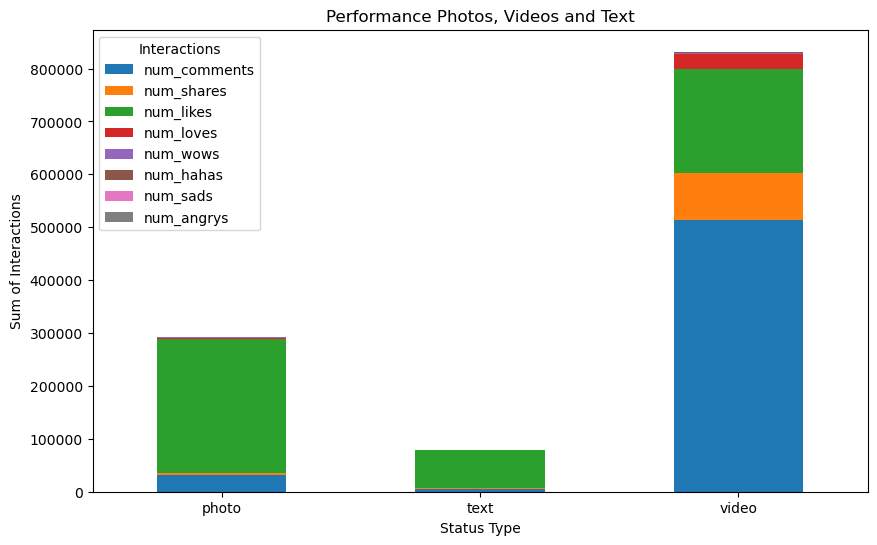

In [342]:
#Getting the unique status_type on Dataset. 
unique_statuses = df['status_type'].unique()

# We have three different types of status_type: Photo, video and Text.

# Group the DataFrame by 'status_type' and calculate the sum of interactions for each type
interaction_sum = df.groupby('status_type')[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum()

# Print the interaction sums
print(interaction_sum)

# Plotting the interaction sums
interaction_sum.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Performance Photos, Videos and Text')
plt.xlabel('Status Type')
plt.ylabel('Sum of Interactions')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.legend(title='Interactions')
plt.show()

In [343]:
##############################################################################
################################ Engagement ##################################
##############################################################################

# Count the number of posts for each status type
num_posts = df['status_type'].value_counts()

# Calculate the average interactions per post for each status type
average_interactions_per_post = interaction_sum.div(num_posts, axis=0)

# Print the average interactions per post
average_interactions_per_post

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,
photo,22.034650,3.038808,175.453915,1.392238,0.681220,0.116424,0.165627,0.054054
text,37.807692,3.314103,467.423077,1.211538,0.858974,0.128205,0.256410,0.012821
video,674.149410,116.851900,257.212320,36.828309,2.505898,2.044561,0.440367,0.275229


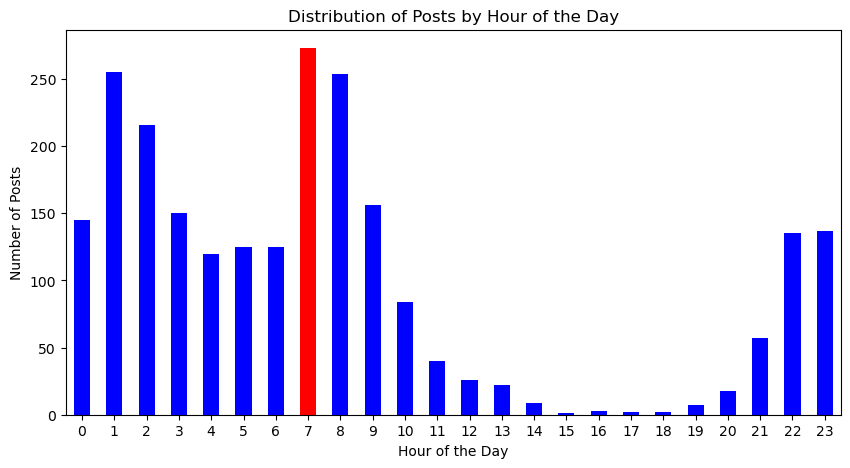

In [344]:
##############################################################################
############################ Time series analysis ############################
##############################################################################

# 1. Distribution of post depending on the hour all posts 

# Assuming the DataFrame and the hourly_distribution have been prepared as before
max_hour = hourly_distribution.idxmax()  # Find the hour with the maximum posts

colors = ['red' if i == max_hour else 'blue' for i in hourly_distribution.index]  # Red for max hour, blue for others

# Plot
plt.figure(figsize=(10, 5))
hourly_distribution.plot(kind='bar', color=colors)  # Use the custom colors list
plt.title('Distribution of Posts by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()


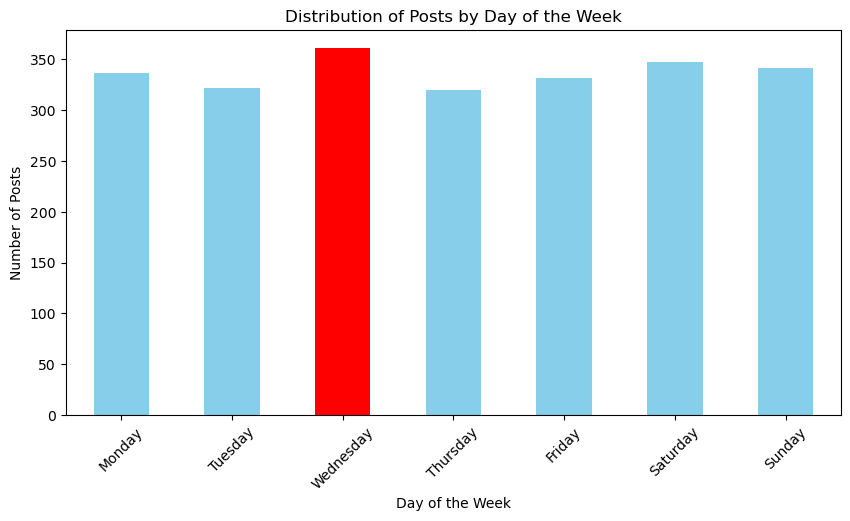

In [345]:
# 2. Distribution of post depending oh the Day of the Week

# Assuming the DataFrame 'df' has been prepared with 'time_published' in datetime format
max_day = weekly_distribution.idxmax()  # Find the day with the maximum posts

# Create a color array, red for the day with the most posts, 'skyblue' for others
colors = ['red' if day == max_day else 'skyblue' for day in weekly_distribution.index]

# Plot the distribution
plt.figure(figsize=(10, 5))
weekly_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of Posts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()


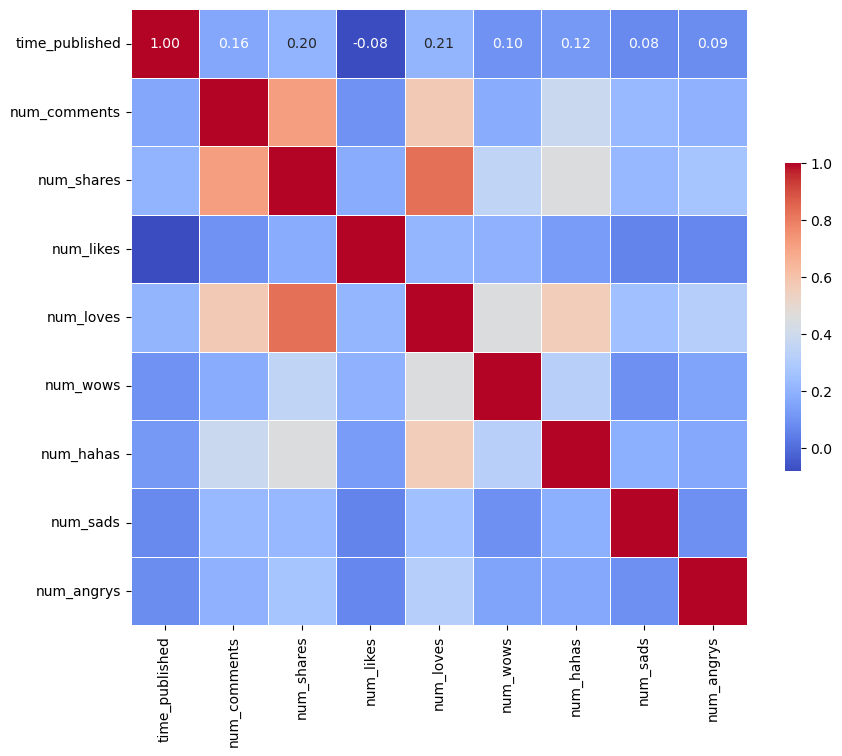

In [346]:
##############################################################################
###############################  HeatMap #####################################
##############################################################################

#Creating a df to drop non - numerical values
df_special = df.drop(['status_id',
                 'status_type',], axis=1)

#Compute the correlation matrix

corr_matrix = df_special.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot 
plt.show()


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Standarization</h3>



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [361]:
##############################################################################
################################ Scree_plot ##################################
##############################################################################

def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if vertical_line_xloc:
        plt.axvline(vertical_line_xloc, linestyle='--', color='red')#visualizing the Red Line
   
        
    # displaying the plot
    plt.show()

##############################################################################
###########################   unsupervised_scaler ##########################
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

In [362]:
##############################################################################
################################ Pre- PCA ####################################
##############################################################################

# Dropping info that we are nor gonna use.
df_pca = df.drop( ['status_id',
                 'status_type', 'time_published'],
                 axis = 1)

# applying the unsupervised_scaler function
df_pca_scaled = scaler(df = df_pca)

print(np.var(df_pca), '\n\n')
print(np.var(df_pca_scaled))

num_comments    733040.526533
num_shares       15315.110634
num_likes       218288.813477
num_loves         1680.086166
num_wows            75.978259
num_hahas           16.896863
num_sads             3.392409
num_angrys           0.817271
dtype: float64 


num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
dtype: float64


/Users/carmencastillomartin/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>PCA: Principal Components Analysis</h3>

<p>
1.Scree Plot and How many components to retain:
Below, there is the graphical representation of the variance explained by each principal component
in a PCA analysis.With the 'elbow' method is simply to decide how many PCA to retained. On the plot below, 
the first three components seem to have a more substantial drop from one to the next than subsequent components. The first principal component explains significantly more variance than the others, and after the third component, the decrease in variance explained by additional components becomes more gradual and levels off. This analysis will retain three principal components as it is clear seen that the first three components explain most of the variance, and after them, the amount of additional variance explained is much less. Beyond three components, we are likely to be capturing less informative variation and more noise. There is a vertical red line developed on the plot to see till which point we need to retain.    
</p>

<p>
2. Interpret each of your retained principal components. Remember to interpret both sides of each principal component: 
    
Positive Side PCA:
    
Viral Publications on San Valentin: 
Key drivers, shares and loves. The high correlation with 'love' appears further underscores that these post likely evoke strong positive emotions, which are essential for virality on special occasions. These emotions might be driven by romantic themes, attractive visuals, engaging narratives that are particular relevant to Valentine´s Day

Informative Content news: 
Key drives: Likes and occasionally Wows. News content typically gain engagement through 'likes', which means a general approval or acknowledgment of the information. This pattern suggests that while the audience might not always dive into share of content, the value of the content is good enough to signal audience approval through likes. 
    
Unsuccessful post: 
These post indicates a general lack of resonance with the audience. Maybe due to low value post or wrong targets or perhaps timings.

Negative Side PCA:
Negative values show that while the PCA increases, the original value tends to increase. Let´s analyze negative values on the 

Viral Publications on San Valentin: 
This PCA does not have any negative value, so that means all the reactions correlated well to the column 

Informative Content news: 
Negative values: It explains post that people do not like to share or comments and this is very common for news post, where people feel feel engaged but they do not want to share. 
    
Unsuccessful post: 
Negatives correlations totally indicates why people why this PCA has been categorized as unsuccessful post so they do not feel any engagement. The negative values here remember that the contents are irrelevant to the audience.
    
</p>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

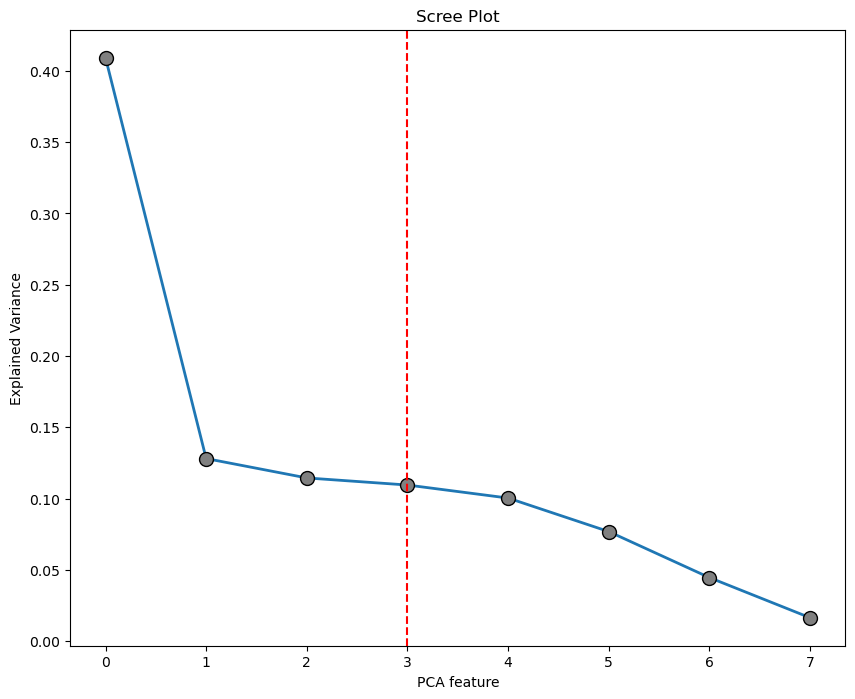

In [363]:
##############################################################################
###################################  PCA #####################################
##############################################################################
#Developing Scree Plot and non restriction

pca = PCA(n_components = None,
          random_state = 702)


# FITTING and TRANSFORMING the scaled data
pca = PCA(n_components=None, random_state=702)

# Fit and transform the data
pca_fit = pca.fit_transform(X=df_pca_scaled)

scree_plot(pca_object = pca)

In [365]:
## PCA with now n_components = 2
pca_2 = PCA(n_components = 3,
          random_state = 702)


# FITTING and TRANSFORMING the scaled data
pca_fit_2 = pca_2.fit_transform(X = df_pca_scaled)





In [366]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(df_pca_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 2)
factor_loadings_2 = pd.DataFrame(np.transpose(pca_2.components_))


# naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(df_pca_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


2 Components Factor Loadings
------------------------------
{factor_loadings_2.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                 0     1     2     3     4     5     6     7
num_comments  0.41 -0.31 -0.03 -0.20 -0.39 -0.18  0.67 -0.24
num_shares    0.49 -0.12  0.05 -0.17 -0.21 -0.22 -0.33  0.71
num_likes     0.16  0.73 -0.35  0.25 -0.49  0.11  0.05  0.00
num_loves     0.50  0.00  0.06 -0.08  0.01 -0.06 -0.56 -0.65
num_wows      0.30  0.48  0.08 -0.08  0.64 -0.42  0.29  0.04
num_hahas     0.37  0.01 -0.05 -0.20  0.28  0.84  0.14  0.12
num_sads      0.20 -0.35 -0.68  0.54  0.27 -0.09 -0.01  0.03
num_angrys    0.22 -0.04  0.63  0.72 -0.04  0.11  0.11  0.04


2 Components Factor Loadings
------------------------------
                 0     1     2
num_comments  0.41 -0.31 -0.03
num_shares    0.49 -0.12  0.05
num_likes     0.16  0.73 -0.35
num_loves     0.50  0.00  0.06
num_wows      0.30  0.48  0.08
num_hahas     0.37  0.01 -0.05
num_sads      0.20 -0.35 -0.68
num_angrys    0.22 -0.04  0.63



In [367]:
# naming each principal component
factor_loadings_2.columns = ['Viral publication on San Valentin', # -Num Loves, -Num shares, -Num comments
                            'Informative Content (News)', # - Num likes, -Num Wows, - Num comments
                            'Unsuccessful Post']   # -Num of Likes - All others are low 
                             


    
# checking the result
factor_loadings_2.head(n=5)

#With this, should we just classify each pca depends on type of content? With

#REMEMBER TO INTERPRET BOTH SIDES ON THE PCA. Put below the table

,Viral publication on San Valentin,Informative Content (News),Unsuccessful Post
num_comments,0.411986,-0.309146,-0.027735
num_shares,0.489206,-0.120280,0.052642
num_likes,0.160566,0.730318,-0.347984
num_loves,0.500223,0.002535,0.064043
num_wows,0.295725,0.479981,0.080354


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Clustering</h3>

<p>
1.Decide on an ideal number of clusters and explain your rationale.
The resulting groups are meaningful and distinct, these three segments represent unique segments 
with PCA-transformed data. 
Each cluster represents a different aspect of content strategy, amplifying what works on the first cluster, maintaining the consistency of the second cluster and correcting the course for the 3rd cluster for types or styles of post. 
</p>

<p>
2. Present and interpret each segment using cluster centroids and give an example of a "normal" post for each segment.

Cluster 1 with variance 3.273609 is the highest variance between the three, this high variance suggests 
that this cluster includes posts that have varying degree of virality and engagement. This cluster 
represents a segment where targeted content has successfully engaged users, making it a crucial cluster 
for understanding impactful content strategies. An example for a 'normal' post would be a promotional Valentine's Day campaign from a jewelry brand, a photo of a couple with the product, alongside a discount code.
The photo will be posted just right before Valentine´s Day to maximize visibility and engagement, using # to improve engagement.
    
Cluster 2 with variance 1.025052 includes lower variance that the cluster 1 but still notable, this cluster 
is more uniform but still varied in how they perform. This content has less fluctuation in engagement 
and reach, which could be indicative of regular followers. This cluster strategy might be optimized for 
consistency and reliability in viewer engagement. A normal post on this cluster would be a news update media outlet about a recent event. The content would be factual, aiming to educate the audience, and could include a long link after the post to read through  
    
Cluster 3 with variance 0.916344 explains post with lack of success, with minors variations among them. The example for his cluster could be a proorly time promotional post from a brand that gets lost amid, which failed on getting attention.
   
</p>
3.Analyze the status types of each segment and report any findings related to photos.
The analysis has code to show the quantity of each type of status do we have per segment. 
We can clearly see that photos are the highest across the 3 segments follow by video and then text. 
Photos Lead Engagement so that  suggest that they are the most engaging and preferred type of content among the audience. This indicates that visual content is key to capturing attention and driving interaction on social media platforms on our segments.
</p>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [368]:
factor_loadings = pca_2.transform(df_pca_scaled)
factor_loadings_df = pd.DataFrame(data = factor_loadings)
factor_loadings_df.columns = factor_loadings_2.columns

In [369]:
# checking variance amongst clusters
np.var(factor_loadings_df)

/Users/carmencastillomartin/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Viral publication on San Valentin    3.273609
Informative Content (News)           1.025052
Unsuccessful Post                    0.916344
dtype: float64

In [370]:
## Rescaling Data 
# applying the unsupervised_scaler function
pca_rescaled = scaler(df =factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_rescaled))

Viral publication on San Valentin    3.273609
Informative Content (News)           1.025052
Unsuccessful Post                    0.916344
dtype: float64 


Viral publication on San Valentin    1.0
Informative Content (News)           1.0
Unsuccessful Post                    1.0
dtype: float64


/Users/carmencastillomartin/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


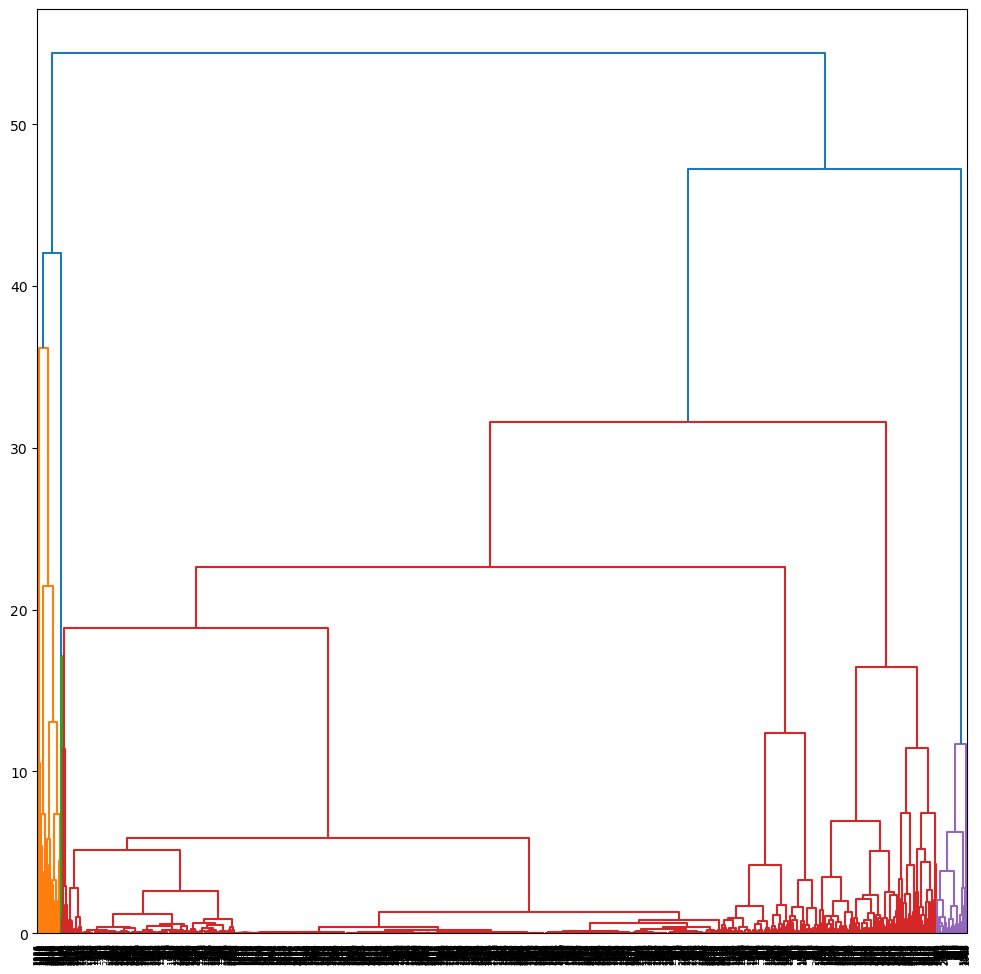

In [371]:
## Dendogram Developing. Trying to understand how many cluster do we need 

standard_mergings_ward = linkage(y=pca_rescaled, method='ward', optimal_ordering=True)

# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z=standard_mergings_ward,
           leaf_rotation=90,
           leaf_font_size=6)

# rendering the plot
plt.show()

In [374]:
# INSTANTIATING a k-Means object with clusters
df_facebook_k_pca = KMeans(n_clusters   = 3     ,
                         n_init       = 'auto',
                         random_state = 702   )


# fitting the object to the data
df_facebook_k_pca.fit(pca_rescaled)


# converting the clusters to a DataFrame
facebook_Kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

Cluster
1    2138
0     135
2      89
Name: count, dtype: int64


In [382]:
##############################################################################
################ Understanding how is the content of each cluster ############
##############################################################################

kmeans = KMeans(n_clusters=3, random_state=702)  
df['Cluster'] = kmeans.fit_predict(pca_rescaled)

# Analyze status_type for each cluster
cluster_status_type = df.groupby('Cluster')['status_type'].value_counts().unstack(fill_value=0)
print(cluster_status_type)


status_type  photo  text  video
Cluster                        
0               73    29     33
1             1364   127    647
2                6     0     83


/Users/carmencastillomartin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Logistic Regression</h3>

<p>
On this apartment, three logistic regression models that would predict if the type of post will 
likely be photo or not photo. Then each model will be evaluate by Train-Test Gap and Test AUC Score.
Then a model will be selected depending on which one will get a lower Train-Test Gap
</p>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [242]:
# standard_scaler
def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

In [243]:
##############################################################################
######################## 01. Model with PCA retained #########################
##############################################################################

df_continuos = df[ ['num_comments', 'num_shares', 'num_likes',
                               'num_loves', 'num_wows', 'num_hahas',
                               'num_sads', 'num_angrys'] ]



# scaling the data
pca_data = standard_scaler(df = df_continuos)

In [312]:
# turning status_type into numeric (1 = photo, 0 = not photo)
df['status_type_numeric'] = np.where(df['status_type'] == 'photo', 1, 0)

In [245]:
##############################################################################
#################### Classification with PCA retained  #######################
##############################################################################


x_data = pca_fit_2
y_data =df['status_type_numeric']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [246]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.008
Test AUC Score: 0.667



In [247]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 85
False Positives: 145
False Negatives: 13
True Positives : 348



In [248]:
##############################################################################
########################### 02. Model x-features ##############################
##############################################################################

x_data = df_continuos
y_data =df['status_type_numeric']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [249]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.017
Test AUC Score: 0.678



In [250]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 92
False Positives: 138
False Negatives: 16
True Positives : 345



In [254]:
##############################################################################
################## 03. Classification Models with Clustering #################
##############################################################################

# Standardizing the data for clustering
pca_rescaled = standard_scaler(df = pd.DataFrame(data = pca_fit_2))


# INSTANTIATING a k-Means object with clusters
facebook_k_pca = KMeans(n_clusters   = 3     ,
                         n_init       = 'auto',
                         random_state = 702   )


# fitting the object to the data
facebook_k_pca.fit(pca_rescaled)


# converting the clusters to a DataFrame
facebook_kmeans_pca = pd.DataFrame({'Cluster': facebook_k_pca.labels_})


# checking cluster populations
print(facebook_kmeans_pca.iloc[: , 0].value_counts())

Cluster
1    2138
0     135
2      89
Name: count, dtype: int64


In [258]:
# checking which observations belong to each cluster
facebook_kmeans_pca.head(n = 3)

,Cluster
0,1
1,1
2,1


In [259]:
# factorizing cluster results. we should assume that each cluster is indepedant

cluster_df = pd.get_dummies(data       = facebook_kmeans_pca['Cluster'],
                            drop_first = True).astype(dtype = int)


# checking results
cluster_df.value_counts(normalize = False).sort_index(ascending = False)

1  2
1  0    2138
0  1      89
   0     135
Name: count, dtype: int64

In [261]:
# selecting x- and y-data
x_data = cluster_df
y_data =df['status_type_numeric']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [262]:
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true  = y_test,
                            y_score = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {round(roc_score, ndigits = 3)}
""")


Train-Test Gap: 0.019
Test AUC Score: 0.527



In [265]:
# storing cluster centers
centroids_pca = pd.DataFrame(data = facebook_k_pca.cluster_centers_)


# checking cluster centers
centroids_pca.round(decimals = 2)

,0,1,2
0,0.41,2.94,-1.09
1,-0.18,-0.13,0.10
2,3.77,-1.40,-0.78


In [266]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 15
False Positives: 215
False Negatives: 4
True Positives : 357



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Final Model Selection</h3>

<p>

Selecting numerical continuous variables (num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys) which represent different types of interactions users have with posts on a platform. 

Setting up the targeting variable status_type_numeric from status_type, where posts labeled as 'photo' are coded as 1, and all other types as 0. This is the outcome will get and help us to predict if a given post is a photo or not based on its engagement metrics.

The logistic regression model is instantiated and fitted to the training data. Logistic regression is a robust  method for binary classification that provides probabilities along with classification results.

We have evaluate the model using accuracy (the proportion of total predictions that were correct) and the AUC (Area Under the ROC Curve) score, which assesses the model's ability to discriminate between the two classes across all thresholds. The results show:

Train-Test Gap: The small gap (0.008) between training and testing accuracy suggests that the model is not overfitting and generalizes well to unseen data. That is why we have selected between the other two as it is the lowest gap 
Test AUC Score: An AUC of 0.667 suggests moderate discriminatory ability. This model might be improved if tunning 

When it comes to the confusion matrix provides a detailed breakdown of the model's predictions:

True Negatives (85): Posts correctly predicted as not being photos.
False Positives (145): Posts incorrectly predicted as photos.
False Negatives (13): Photos incorrectly predicted as not being photos.
True Positives (348): Photos correctly identified.
    

As we see on the results the model is particularly good at identifying 'photo' posts but has a relatively high rate of false positives, where non-photo posts are misclassified as photos. The model provides a good approach for classifying posts based on the engagement metrics. 
</p>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [310]:
##############################################################################
################# 01. Model with PCA retained - Final Model ##################
##############################################################################

df_continuos = df[ ['num_comments', 'num_shares', 'num_likes',
                               'num_loves', 'num_wows', 'num_hahas',
                               'num_sads', 'num_angrys'] ]



# scaling the data
pca_data = standard_scaler(df = df_continuos)

In [313]:
##############################################################################
#################### Classification with PCA retained  #######################
##############################################################################


x_data = pca_fit_2
y_data =df['status_type_numeric']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [314]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.008
Test AUC Score: 0.667



In [315]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 85
False Positives: 145
False Negatives: 13
True Positives : 348

